# AlvinApp Competition

This is a simple starter notebook to get started with the AvinApp Competition on Zindi.

This notebook covers:

*   Loading the data
*   Simple Exploratory Data Analysis and an example of feature engineering
*   Data preprocessing and data wrangling
*   Creating a simple model
*   Making a submission
*   Some tips for improving your score







## Importing libraries

In [192]:
# Dataframe and Plotting libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss


pd.set_option('display.max_columns', None)
# from google.colab import files
import warnings
warnings.filterwarnings('ignore')

## 1. Load the dataset

In [193]:
var_desc = pd.read_csv('VariableDefinitions.csv')

In [194]:
var_desc

,COLUMN_NAME,COLUMN_DEFINATION
0,MERCHANT_CATEGORIZED_AT,The time the merchant was categorized by the c...
1,MERCHANT_NAME,The name of the merchant
2,MERCHANT_CATEGORIZED_AS,The category the merchant was assigned by the ...
3,PURCHASE_VALUE,The value of the purchase made by the customer
4,PURCHASED_AT,The time the purchase was made
5,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,If true indicates that the merchant is not a r...
6,USER_EMAIL,The email of the customer
7,USER_AGE,The age of the customer
8,USER_GENDER,The gender of the customer
9,USER_HOUSEHOLD,The number of family members


In [195]:
var_desc['COLUMN_DEFINATION'][0]

'The time the merchant was categorized by the customer'

In [196]:
# Load the files into a Pandas Dataframe
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
ss = pd.read_csv('SampleSubmission.csv')
extr=pd.read_csv('extra_data.csv')

# Merging the extra dataset with the train dataset

In [197]:
extr

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
0,NaN,MARK NYABAYO,NaN,20,2021-03-22 12:37:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_v13grrw3
1,NaN,ACCESS AFYA,NaN,1,2021-07-05 11:07:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_rgne8ij5
2,NaN,POA,NaN,1500,2021-06-21 19:40:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_4i2b28b6
3,NaN,POA,NaN,1500,2021-04-22 18:41:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_6dvi32yc
4,NaN,ACCESS AFYA,NaN,1,2021-07-29 13:03:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_sfk1yxbm
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,FESTUS MBITHI MUTINDA,NaN,30,2022-04-09 15:37:00+00,False,NaN,Male,1,5000,ID_F7B7BAJ0,ID_6arln23v
9996,NaN,UONSDA CHURCH TITHE-MAIN,NaN,100,2022-04-09 09:02:00+00,False,NaN,Male,1,5000,ID_F7B7BAJ0,ID_msuxva0z
9997,NaN,MAWINGU AIRTIME LIMITED,NaN,20,2022-04-10 18:57:00+00,False,NaN,Male,1,5000,ID_F7B7BAJ0,ID_flro17hp
9998,NaN,CIC MONEY MARKET FUND,NaN,105300,2021-12-29 11:13:00+00,False,27.0,Female,1,35000,ID_B5KBXPAO,ID_bb2ghfuy


In [198]:
# Let’s observe the shape of our datasets.
print('Train data shape :', train.shape)
print('Test data shape :', test.shape)

Train data shape : (373, 12)
Test data shape : (558, 11)


The above output shows the number of rows and columns for train and test dataset. We have 12 variables in the train dataset, 11 independent variables and 1 dependent variable. In the test dataset, we have 11 independent variables.

We can observe the first five rows from our data set by using the head() method from the pandas library.

In [199]:
# Inspect the training data
train.head()

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
0,2022-05-04 10:25:50.588042+00,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,2022-05-04 13:56:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_04mk78fa
1,2021-10-25 16:18:38.586837+00,PARK N GO,Transport & Fuel,100,2021-10-24 14:12:00+00,False,25.0,Female,4,90000,ID_U9WZMGJZ,ID_04xkfb07
2,2022-05-20 14:17:30.917297+00,SAFARICOM OFFERS TUNUKIWA,Data & WiFi,20,2022-05-27 12:46:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_051urwuw
3,2022-04-12 15:59:14.139347+00,ZILLIONS CREDIT LIMITED,Loan Repayment,3800,2022-02-07 12:16:00+00,False,NaN,Male,5,252000,ID_3JA0MAFB,ID_0e1om7rz
4,2022-05-04 10:24:26.709045+00,MICHAEL MUSEMBI,Bills & Fees,60,2022-05-04 15:28:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_0kfcoawb


In [200]:
test.head()

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
0,2022-06-01 10:25:16.7131+00,KCB PAYBILL AC,150000,2022-05-05 08:29:00+00,True,NaN,Male,5,150000,ID_O8P8YS18,ID_00x9h2yx
1,2022-03-16 13:05:51.851102+00,IPAY LTD,7394,2019-10-05 16:02:00+00,False,NaN,Female,1,10000,ID_40L9OTIM,ID_01db594f
2,2022-03-10 18:25:42.112294+00,JOHN NJIRU GAKUNJU,200,2021-11-25 09:56:00+00,False,NaN,Female,1,85000,ID_1I8XYBWK,ID_07pm99no
3,2022-04-12 15:59:14.139347+00,UONSDA CHURCH OFFERING-MAIN,50,2022-04-11 14:48:00+00,False,NaN,Male,2,10000,ID_GR569FUO,ID_09jryhkd
4,2022-05-04 10:24:26.709045+00,M-SHWARI LOCK SAVINGS,10000,2022-05-04 13:59:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_0ccv924c


It is important to understand the meaning of each feature so you can really understand the dataset. You can read the VariableDefinition.csv file to understand the meaning of each variable presented in the dataset.

The SampleSubmission.csv gives us an example of what our submission file should look like. This file will contain the unique id column combined with the merchant name from the Test.csv file and the target we predict with our model. Once we have created this file, we will submit it to the competition page and obtain a position on the leaderboard.

In [201]:
# View the submission file
ss.head()

,Transaction_ID,Bills & Fees,Data & WiFi,Education,Emergency fund,Family & Friends,Going out,Groceries,Health,Loan Repayment,Miscellaneous,Rent / Mortgage,Shopping,Transport & Fuel
0,ID_00x9h2yx,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ID_01db594f,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ID_07pm99no,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ID_09jryhkd,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ID_0ccv924c,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2. Understand the dataset

Let's look at a bar graph of the train data.

<BarContainer object of 373 artists>

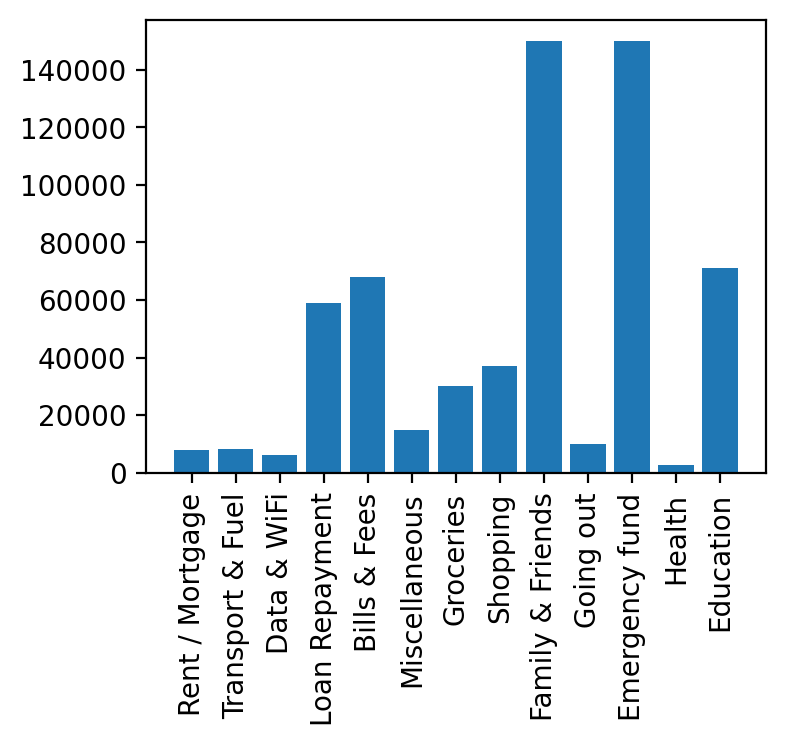

In [202]:
# Show a bar graph of the purchase_value vs the target in the train data (merchant_categorized_as)
plt.figure(dpi=200, figsize=(4,3))
plt.xticks(rotation=90)
plt.bar(data=train, x='MERCHANT_CATEGORIZED_AS', height='PURCHASE_VALUE')

It's interesting to note that more money was spent on education than bills & fees, emergency fund, rent/mortgage and loan repayment.

Also very little was spent on health and transport & fuel.

Let's look at more detail by running the .info method

The output shows the list of variables/features, sizes, if it contains missing values and the data type for each variable. We have 3 features of the integer data type, 6 features of the object data type, 1 of the boolean data type and 1 of the float data type.

If you want to learn how to handle missing data in your dataset, we recommend you read [How to Handle Missing Data with Python](https://machinelearningmastery.com/handle-missing-data-python/) by Jason Brownlee.

For more information you can visit the link below.

[Why you need to explore your data and how you can start](https://https://medium.com/analytics-vidhya/why-you-need-to-explore-your-data-how-you-can-start-13de6f29c8c1)

Encode the target labels to values to show a correlation matrix.

In [203]:
# Use a dictionary comprehension and zip to create a dictionary for all the categories in the train data
labels_train = train['MERCHANT_CATEGORIZED_AS'].astype('category').cat.categories.tolist()
replace_map_train = {'MERCHANT_CATEGORIZED_AS' : {k: v for k,v in zip(labels_train,list(range(1,len(labels_train)+1)))}}
print("Train data: ", replace_map_train)

Train data:  {'MERCHANT_CATEGORIZED_AS': {'Bills & Fees': 1, 'Data & WiFi': 2, 'Education': 3, 'Emergency fund': 4, 'Family & Friends': 5, 'Going out': 6, 'Groceries': 7, 'Health': 8, 'Loan Repayment': 9, 'Miscellaneous': 10, 'Rent / Mortgage': 11, 'Shopping': 12, 'Transport & Fuel': 13}}


In [204]:
# Create a copy to use for the correlation matrix (as it only accepts numerical data)
#train_data_corr = train.copy()

In [205]:
# Replace the categories with the numerical equivalents from the dictionary
train.replace(replace_map_train, inplace=True)

Correlation matrix

<AxesSubplot:>

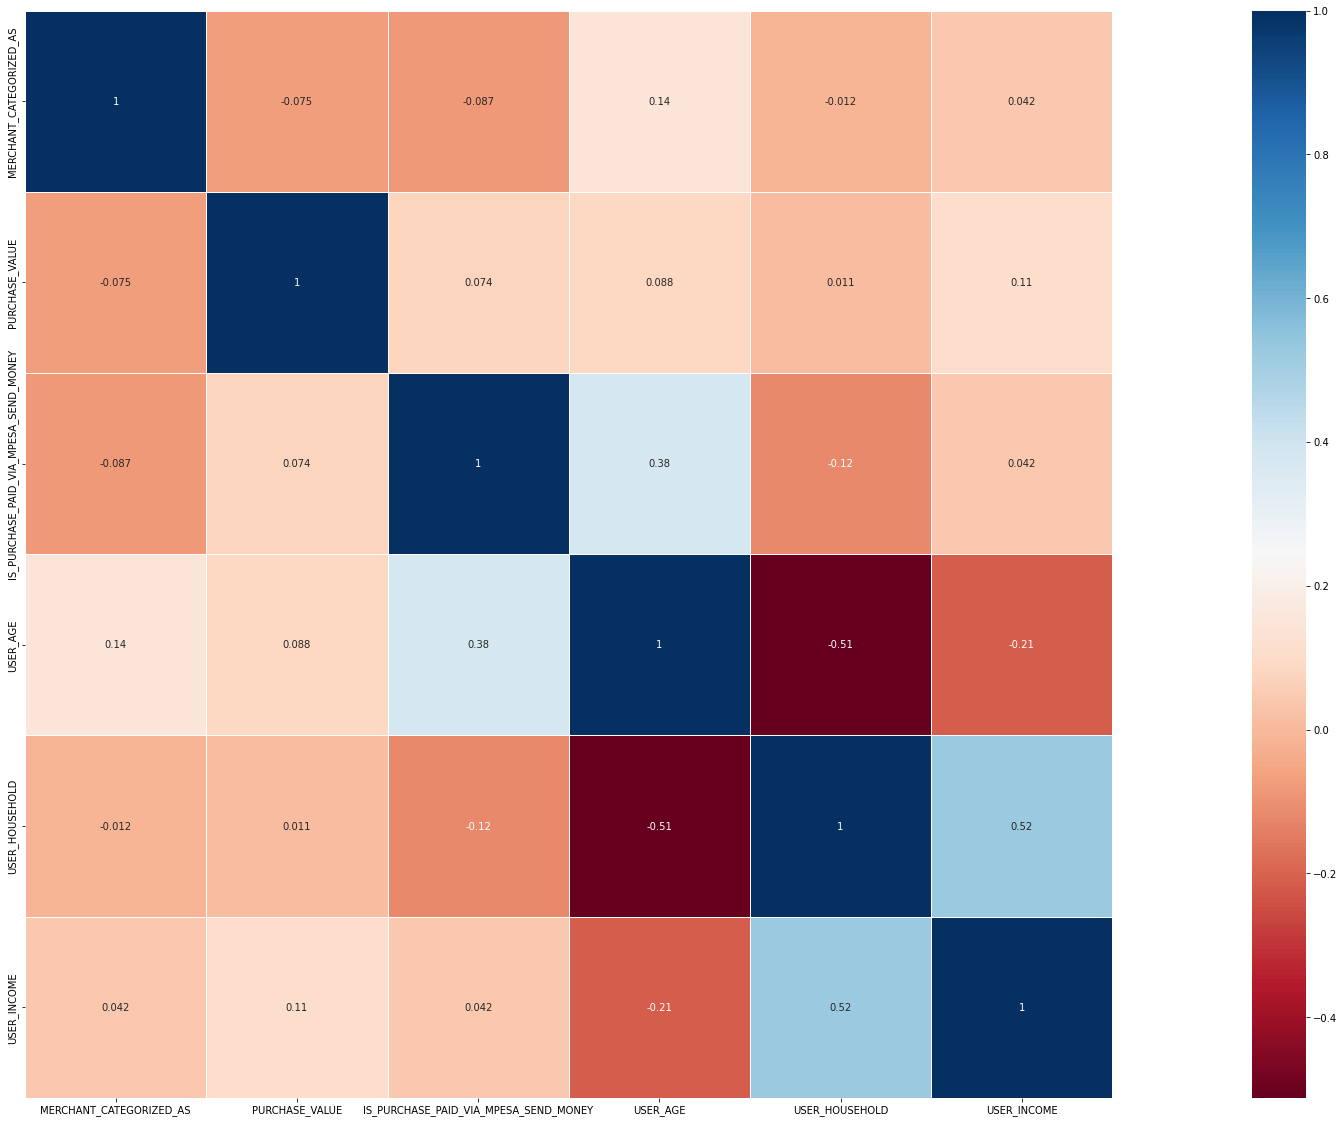

In [206]:
import seaborn as sns
corrmat =train.corr()
f, ax = plt.subplots(figsize=(50,20))
sns.heatmap(corrmat, square=True, annot=True,linewidth=0.8, cmap='RdBu')

In [207]:
test

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
0,2022-06-01 10:25:16.7131+00,KCB PAYBILL AC,150000,2022-05-05 08:29:00+00,True,NaN,Male,5,150000,ID_O8P8YS18,ID_00x9h2yx
1,2022-03-16 13:05:51.851102+00,IPAY LTD,7394,2019-10-05 16:02:00+00,False,NaN,Female,1,10000,ID_40L9OTIM,ID_01db594f
2,2022-03-10 18:25:42.112294+00,JOHN NJIRU GAKUNJU,200,2021-11-25 09:56:00+00,False,NaN,Female,1,85000,ID_1I8XYBWK,ID_07pm99no
3,2022-04-12 15:59:14.139347+00,UONSDA CHURCH OFFERING-MAIN,50,2022-04-11 14:48:00+00,False,NaN,Male,2,10000,ID_GR569FUO,ID_09jryhkd
4,2022-05-04 10:24:26.709045+00,M-SHWARI LOCK SAVINGS,10000,2022-05-04 13:59:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_0ccv924c
...,...,...,...,...,...,...,...,...,...,...,...
553,2021-11-26 08:29:58.261766+00,CARREFOUR GLR,6606,2021-11-27 15:18:00+00,False,NaN,Male,3,200000,ID_ECX9BS4A,ID_zvole537
554,2022-04-12 15:59:14.139347+00,LEAH NGOGA,928,2022-01-25 09:41:00+00,True,NaN,Male,5,252000,ID_3JA0MAFB,ID_zy4igt1w
555,2022-04-12 15:59:14.139347+00,DECATHLON HUB TILL 5,30,2022-02-10 14:21:00+00,False,NaN,Male,5,252000,ID_3JA0MAFB,ID_zy4urqmq
556,2022-05-31 13:27:24.704992+00,JERUSA A OTIENO,50000,2019-09-07 18:24:00+00,True,NaN,Female,3,85000,ID_J8O7LHZ2,ID_zym0pkxl


We can see that not many things are correlated with MERCHANT_CATEGORIZED_AS, so it seems like we don't have enough data.

We need to drop empty rows if there are any.

In [208]:
#train=train_data_corr

In [209]:
train.dropna(how='all', inplace=True)
test.dropna(how='all', inplace=True)
extr.dropna(how='all', inplace=True)

In [210]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MERCHANT_CATEGORIZED_AT                373 non-null    object 
 1   MERCHANT_NAME                          373 non-null    object 
 2   MERCHANT_CATEGORIZED_AS                373 non-null    int64  
 3   PURCHASE_VALUE                         373 non-null    int64  
 4   PURCHASED_AT                           373 non-null    object 
 5   IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY  373 non-null    bool   
 6   USER_AGE                               61 non-null     float64
 7   USER_GENDER                            367 non-null    object 
 8   USER_HOUSEHOLD                         373 non-null    int64  
 9   USER_INCOME                            373 non-null    int64  
 10  USER_ID                                373 non-null    object 
 11  Transa

In [211]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558 entries, 0 to 557
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MERCHANT_CATEGORIZED_AT                558 non-null    object 
 1   MERCHANT_NAME                          558 non-null    object 
 2   PURCHASE_VALUE                         558 non-null    int64  
 3   PURCHASED_AT                           558 non-null    object 
 4   IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY  558 non-null    bool   
 5   USER_AGE                               85 non-null     float64
 6   USER_GENDER                            553 non-null    object 
 7   USER_HOUSEHOLD                         558 non-null    int64  
 8   USER_INCOME                            558 non-null    int64  
 9   USER_ID                                558 non-null    object 
 10  Transaction_ID                         558 non-null    object 
dtypes: boo

In [212]:
extr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MERCHANT_CATEGORIZED_AT                0 non-null      float64
 1   MERCHANT_NAME                          10000 non-null  object 
 2   MERCHANT_CATEGORIZED_AS                0 non-null      float64
 3   PURCHASE_VALUE                         10000 non-null  int64  
 4   PURCHASED_AT                           10000 non-null  object 
 5   IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY  10000 non-null  bool   
 6   USER_AGE                               1158 non-null   float64
 7   USER_GENDER                            9966 non-null   object 
 8   USER_HOUSEHOLD                         10000 non-null  int64  
 9   USER_INCOME                            10000 non-null  int64  
 10  USER_ID                                10000 non-null  object 
 11  Tra

We can see that the number of entries in Age for the Test set don't correspond to the rest of its entries and for the Train set there are missing entries for Age and for Gender, which means we have some missing values.

In [213]:
# We can also use the .isnull() method to check for empty values
print('Missing values for Train:', train.isnull().sum())
print('')
print('Missing values for Test:', test.isnull().sum())

Missing values for Train: MERCHANT_CATEGORIZED_AT                    0
MERCHANT_NAME                              0
MERCHANT_CATEGORIZED_AS                    0
PURCHASE_VALUE                             0
PURCHASED_AT                               0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY      0
USER_AGE                                 312
USER_GENDER                                6
USER_HOUSEHOLD                             0
USER_INCOME                                0
USER_ID                                    0
Transaction_ID                             0
dtype: int64

Missing values for Test: MERCHANT_CATEGORIZED_AT                    0
MERCHANT_NAME                              0
PURCHASE_VALUE                             0
PURCHASED_AT                               0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY      0
USER_AGE                                 473
USER_GENDER                                5
USER_HOUSEHOLD                             0
USER_INCOME                        

There are 4 missing Gender entries and 329 missing Age entries in the train data and 591 missing Age entries for the test data.

In [214]:
train['USER_AGE'].unique()

array([nan, 25., 27., 26., 32.])

In [215]:
test['USER_AGE'].unique()

array([nan, 25., 26., 27., 32., 29.])

In [216]:
agen=train[train['USER_AGE'].isna()]['USER_ID'].unique()
nage=extr[extr['USER_AGE'].notnull()]['USER_ID'].unique()

In [217]:
set(agen)&set(nage)
sorted(set(agen)&set(nage), key = lambda k : agen.index(k))

[]

on the extra data there no age for the users that appear in our train dataset 

In [218]:
test[test['USER_GENDER'].isnull()]

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
124,2021-08-06 11:28:16.857538+00,ACCESS AFYA,1,2021-08-05 09:32:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_8oyhw5j0
138,2021-11-30 10:51:36.702996+00,PETER INDIMULI,1028,2021-04-08 12:07:00+00,True,NaN,NaN,1,10000,ID_R4T8Q46J,ID_9au0g3qv
374,2021-11-30 10:51:36.702996+00,MICHELLE RODROT,827,2021-07-22 13:36:00+00,True,NaN,NaN,1,10000,ID_R4T8Q46J,ID_p5ajidvp
395,2021-11-30 10:51:36.702996+00,DORCAS WANJOHI,2600,2021-06-07 14:05:00+00,True,NaN,NaN,1,10000,ID_R4T8Q46J,ID_qd7dgqor
550,2021-11-30 10:52:38.553994+00,POA,1500,2021-05-22 19:11:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_zqi8lti6


### Empty entries

By further investigation we see that the empty gender entries in the train set are all for one user: ID_R4T8Q46J in both train and test, therefore we can fill the gender with a value

In [219]:
train.USER_GENDER.value_counts()

Male      197
Female    170
Name: USER_GENDER, dtype: int64

In [220]:
test.USER_GENDER.value_counts()

Male      307
Female    246
Name: USER_GENDER, dtype: int64

In [221]:
extr.USER_GENDER.value_counts()

Male      5317
Female    4649
Name: USER_GENDER, dtype: int64

Male value seems to be the most common, therefore we'll fill the missing value with male

In [222]:
train["USER_GENDER"] = train["USER_GENDER"].apply(lambda x: "Male" if pd.isna(x) else x)
test["USER_GENDER"] = test["USER_GENDER"].apply(lambda x: "Male" if pd.isna(x) else x)

In [223]:
#just to test
extr["USER_GENDER"] = extr["USER_GENDER"].apply(lambda x: "Male" if pd.isna(x) else x)

Let's see how this affected our shape

In [224]:
train.shape

(373, 12)

In [225]:
# Impute the missing age entries with the median of that column
train_median_value = np.median(train['USER_AGE'].dropna())
train['USER_AGE'] = train['USER_AGE'].fillna(train_median_value)

test_median_value = np.median(test['USER_AGE'].dropna())
test['USER_AGE'] = test['USER_AGE'].fillna(test_median_value)

extr_median_value = np.median(extr['USER_AGE'].dropna())
extr['USER_AGE'] = extr['USER_AGE'].fillna(extr_median_value)

In [226]:
# Check that it's done
train.isna().sum()

MERCHANT_CATEGORIZED_AT                  0
MERCHANT_NAME                            0
MERCHANT_CATEGORIZED_AS                  0
PURCHASE_VALUE                           0
PURCHASED_AT                             0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY    0
USER_AGE                                 0
USER_GENDER                              0
USER_HOUSEHOLD                           0
USER_INCOME                              0
USER_ID                                  0
Transaction_ID                           0
dtype: int64

In [227]:
test.isna().sum()

MERCHANT_CATEGORIZED_AT                  0
MERCHANT_NAME                            0
PURCHASE_VALUE                           0
PURCHASED_AT                             0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY    0
USER_AGE                                 0
USER_GENDER                              0
USER_HOUSEHOLD                           0
USER_INCOME                              0
USER_ID                                  0
Transaction_ID                           0
dtype: int64

In [228]:
extr.isna().sum()

MERCHANT_CATEGORIZED_AT                  10000
MERCHANT_NAME                                0
MERCHANT_CATEGORIZED_AS                  10000
PURCHASE_VALUE                               0
PURCHASED_AT                                 0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY        0
USER_AGE                                     0
USER_GENDER                                  0
USER_HOUSEHOLD                               0
USER_INCOME                                  0
USER_ID                                      0
Transaction_ID                               0
dtype: int64

In [229]:
train['MERCHANT_NAME'].nunique()

218

In [230]:
test['MERCHANT_NAME'].nunique()

314

In [231]:
train['USER_ID'].nunique()

25

In [232]:
test['USER_ID'].nunique()

30

# # working on dates 

In [233]:
train

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
0,2022-05-04 10:25:50.588042+00,UONSDA CHURCH MOGERE MWAYO TITHE,11,1700,2022-05-04 13:56:00+00,False,25.0,Male,3,10000,ID_ZX4DCF4K,ID_04mk78fa
1,2021-10-25 16:18:38.586837+00,PARK N GO,13,100,2021-10-24 14:12:00+00,False,25.0,Female,4,90000,ID_U9WZMGJZ,ID_04xkfb07
2,2022-05-20 14:17:30.917297+00,SAFARICOM OFFERS TUNUKIWA,2,20,2022-05-27 12:46:00+00,False,25.0,Male,3,10000,ID_ZX4DCF4K,ID_051urwuw
3,2022-04-12 15:59:14.139347+00,ZILLIONS CREDIT LIMITED,9,3800,2022-02-07 12:16:00+00,False,25.0,Male,5,252000,ID_3JA0MAFB,ID_0e1om7rz
4,2022-05-04 10:24:26.709045+00,MICHAEL MUSEMBI,1,60,2022-05-04 15:28:00+00,False,25.0,Male,3,10000,ID_ZX4DCF4K,ID_0kfcoawb
...,...,...,...,...,...,...,...,...,...,...,...,...
368,2021-08-06 11:28:03.723042+00,ONESMUS GAKURU,10,500,2021-08-26 13:38:00+00,True,27.0,Female,2,8000,ID_L8QMYB09,ID_zr5x8yjs
369,2022-04-12 15:57:05.758311+00,GLADWELL MBURU,10,400,2022-04-03 08:39:00+00,True,25.0,Male,5,750000,ID_D8FOVVBB,ID_zty81sq8
370,2021-12-01 08:33:13.82067+00,SAFARICOM LIMITED,2,500,2021-01-15 15:40:00+00,False,25.0,Male,3,200000,ID_ECX9BS4A,ID_zx5ajeqe
371,2021-10-05 12:29:13.14963+00,EQUITY PAYBILL ACCOUNT,1,14000,2021-10-08 10:33:00+00,True,25.0,Female,4,90000,ID_U9WZMGJZ,ID_zx9hnvvb


In [234]:
#examples 
temp = '2022-05-04 10:25:50.588042+00'

In [235]:
int(temp[8:10])

4

In [236]:
train['Month']=train['PURCHASED_AT'].apply(lambda x : int(x[5:7]))

train['Year']=train['PURCHASED_AT'].apply(lambda x : int(x[2:4]))

train['Day']=train['PURCHASED_AT'].apply(lambda x : int(x[8:10]))

In [237]:
test['Month']=test['PURCHASED_AT'].apply(lambda x : int(x[5:7]))

test['Year']=test['PURCHASED_AT'].apply(lambda x : int(x[2:4]))

test['Day']=test['PURCHASED_AT'].apply(lambda x : int(x[8:10]))

In [238]:
extr['Month']=extr['PURCHASED_AT'].apply(lambda x : int(x[5:7]))

extr['Year']=extr['PURCHASED_AT'].apply(lambda x : int(x[2:4]))

extr['Day']=extr['PURCHASED_AT'].apply(lambda x : int(x[8:10]))

In [239]:
def partsofmonths(m):
    if m < 6:
        return 1
    elif m > 25:
        return 2
    else:
        return 3

train['partsM'] = train['Day'].apply(lambda x: partsofmonths(x))
test['partsM'] = test['Day'].apply(lambda x: partsofmonths(x))
extr['partsM'] = extr['Day'].apply(lambda x: partsofmonths(x))

In [240]:
train

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID,Month,Year,Day,partsM
0,2022-05-04 10:25:50.588042+00,UONSDA CHURCH MOGERE MWAYO TITHE,11,1700,2022-05-04 13:56:00+00,False,25.0,Male,3,10000,ID_ZX4DCF4K,ID_04mk78fa,5,22,4,1
1,2021-10-25 16:18:38.586837+00,PARK N GO,13,100,2021-10-24 14:12:00+00,False,25.0,Female,4,90000,ID_U9WZMGJZ,ID_04xkfb07,10,21,24,3
2,2022-05-20 14:17:30.917297+00,SAFARICOM OFFERS TUNUKIWA,2,20,2022-05-27 12:46:00+00,False,25.0,Male,3,10000,ID_ZX4DCF4K,ID_051urwuw,5,22,27,2
3,2022-04-12 15:59:14.139347+00,ZILLIONS CREDIT LIMITED,9,3800,2022-02-07 12:16:00+00,False,25.0,Male,5,252000,ID_3JA0MAFB,ID_0e1om7rz,2,22,7,3
4,2022-05-04 10:24:26.709045+00,MICHAEL MUSEMBI,1,60,2022-05-04 15:28:00+00,False,25.0,Male,3,10000,ID_ZX4DCF4K,ID_0kfcoawb,5,22,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,2021-08-06 11:28:03.723042+00,ONESMUS GAKURU,10,500,2021-08-26 13:38:00+00,True,27.0,Female,2,8000,ID_L8QMYB09,ID_zr5x8yjs,8,21,26,2
369,2022-04-12 15:57:05.758311+00,GLADWELL MBURU,10,400,2022-04-03 08:39:00+00,True,25.0,Male,5,750000,ID_D8FOVVBB,ID_zty81sq8,4,22,3,1
370,2021-12-01 08:33:13.82067+00,SAFARICOM LIMITED,2,500,2021-01-15 15:40:00+00,False,25.0,Male,3,200000,ID_ECX9BS4A,ID_zx5ajeqe,1,21,15,3
371,2021-10-05 12:29:13.14963+00,EQUITY PAYBILL ACCOUNT,1,14000,2021-10-08 10:33:00+00,True,25.0,Female,4,90000,ID_U9WZMGJZ,ID_zx9hnvvb,10,21,8,3


### Drop unnecessary columns

We can also drop unnecessary categorical columns as we're currently not interested in when the purchases were made or when they were categorized.

# Aditional feature engineering

    I am gonna try to classify people to rich and normal also poor

<AxesSubplot:>

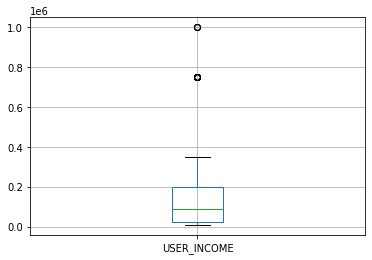

In [241]:
train.boxplot(['USER_INCOME'])

<AxesSubplot:>

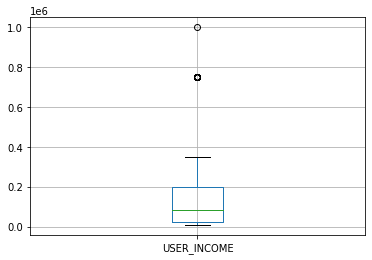

In [242]:
test.boxplot(['USER_INCOME'])

In [243]:
def socialclass(inc):
    if inc>200000:
        return 1
    elif inc<8000:
        return 3
    else:
        return 2

In [244]:
train['SocialClass']=train['USER_INCOME'].apply(lambda x: socialclass(x))
test['SocialClass']=test['USER_INCOME'].apply(lambda x: socialclass(x))
extr['SocialClass']=extr['USER_INCOME'].apply(lambda x: socialclass(x))

In [245]:
def purchaseImportance(pr):
    if pr<20000:
        return 0
    elif pr>80000:
        return 2
    else:
        return 1
train['purchaseIMP']=train['PURCHASE_VALUE'].apply(lambda x:purchaseImportance(x))
test['purchaseIMP']=test['PURCHASE_VALUE'].apply(lambda x:purchaseImportance(x))
extr['purchaseIMP']=extr['PURCHASE_VALUE'].apply(lambda x:purchaseImportance(x))

In [246]:
train['USER_HOUSEHOLD'].unique()

array([3, 4, 5, 2, 1, 7, 6], dtype=int64)

In [247]:
test['USER_HOUSEHOLD'].unique()

array([5, 1, 2, 3, 4, 7, 6, 9, 8], dtype=int64)

In [248]:
extr['USER_HOUSEHOLD'].unique()

array([1, 4, 2, 6, 3, 9, 5, 7, 8], dtype=int64)

<AxesSubplot:>

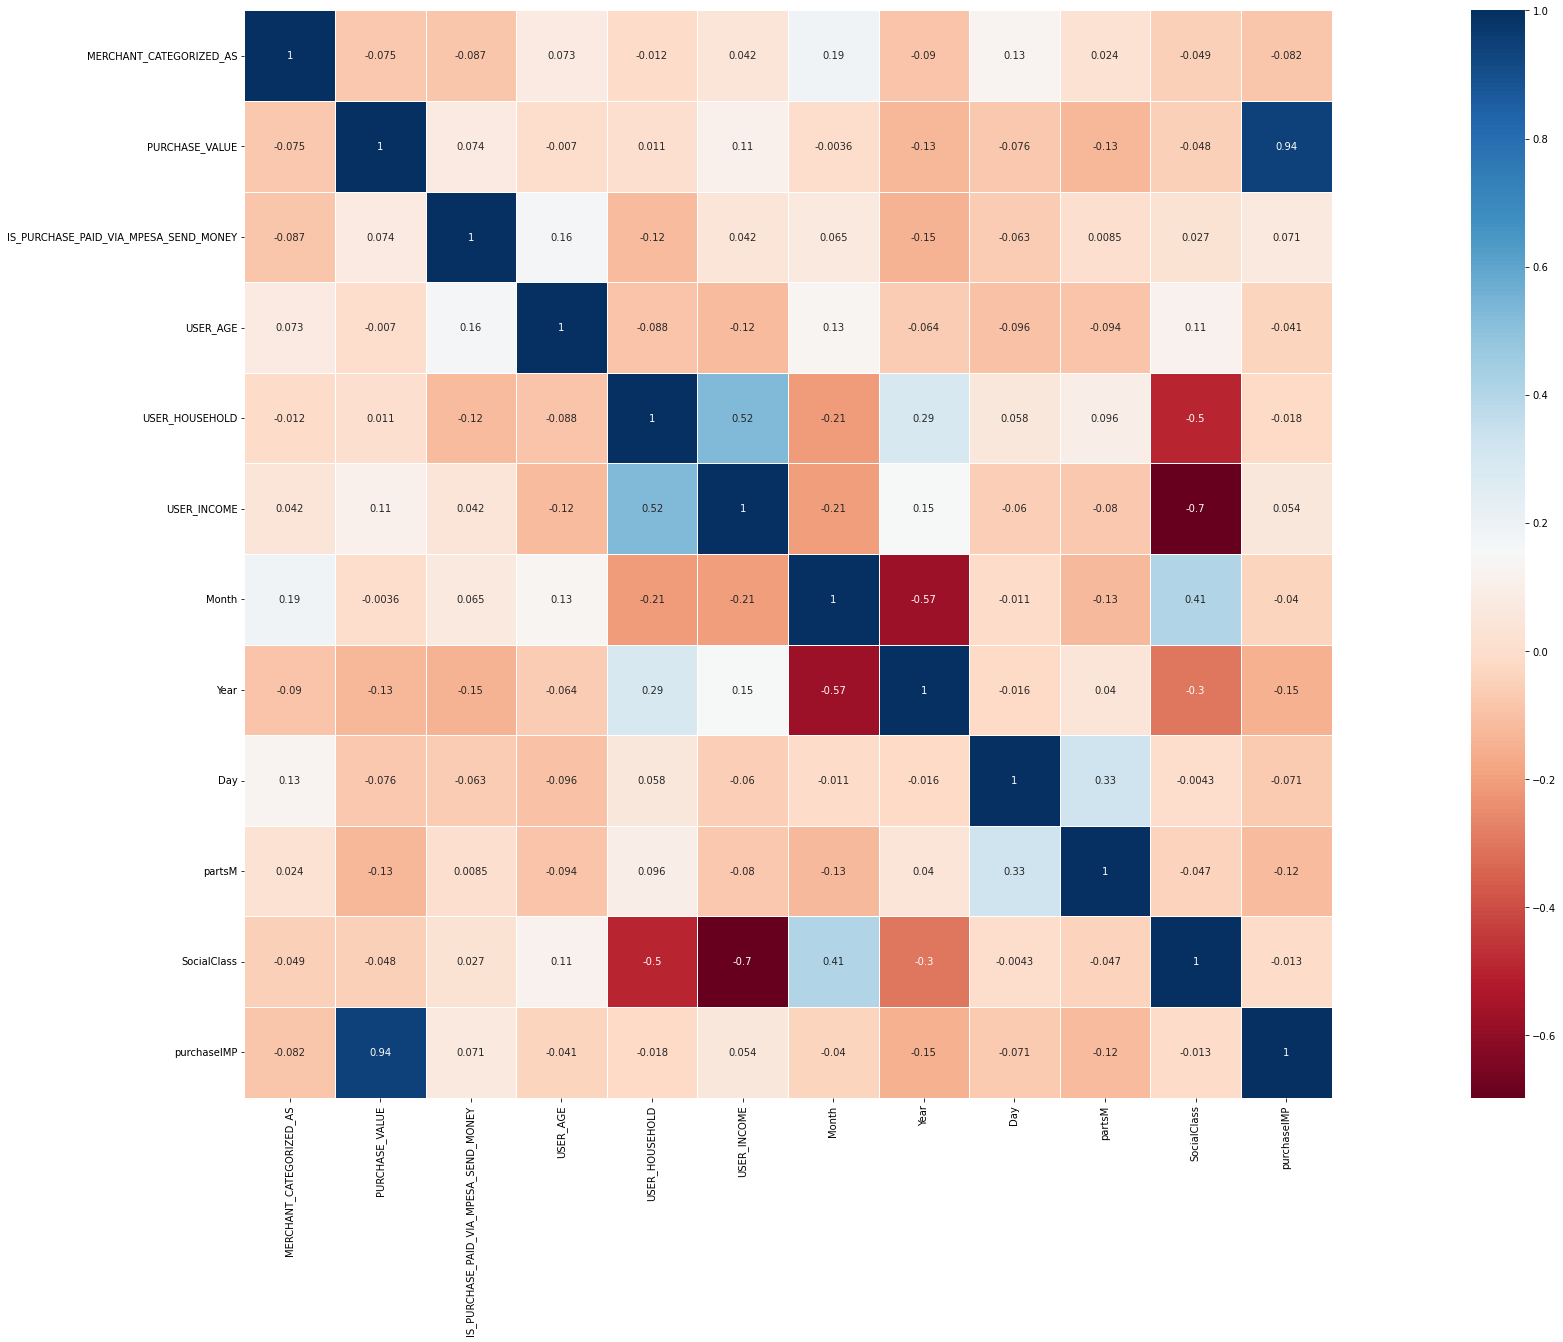

In [249]:
corrmat =train.corr()
f, ax = plt.subplots(figsize=(50,20))
sns.heatmap(corrmat, square=True, annot=True,linewidth=0.8, cmap='RdBu')

In [250]:
train = train.drop(['MERCHANT_CATEGORIZED_AT','PURCHASED_AT','USER_ID','USER_INCOME','MERCHANT_NAME','Transaction_ID'], axis=1)
test = test.drop(['MERCHANT_CATEGORIZED_AT','PURCHASED_AT','USER_ID','MERCHANT_NAME'], axis=1)
extr = extr.drop(['MERCHANT_CATEGORIZED_AT','PURCHASED_AT','USER_ID','MERCHANT_NAME','MERCHANT_CATEGORIZED_AS'], axis=1)

In [251]:
test

,PURCHASE_VALUE,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,Transaction_ID,Month,Year,Day,partsM,SocialClass,purchaseIMP
0,150000,True,25.0,Male,5,150000,ID_00x9h2yx,5,22,5,1,2,2
1,7394,False,25.0,Female,1,10000,ID_01db594f,10,19,5,1,2,0
2,200,False,25.0,Female,1,85000,ID_07pm99no,11,21,25,3,2,0
3,50,False,25.0,Male,2,10000,ID_09jryhkd,4,22,11,3,2,0
4,10000,False,25.0,Male,3,10000,ID_0ccv924c,5,22,4,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,6606,False,25.0,Male,3,200000,ID_zvole537,11,21,27,2,2,0
554,928,True,25.0,Male,5,252000,ID_zy4igt1w,1,22,25,3,1,0
555,30,False,25.0,Male,5,252000,ID_zy4urqmq,2,22,10,3,1,0
556,50000,True,25.0,Female,3,85000,ID_zym0pkxl,9,19,7,3,2,1


In [252]:
extr

,PURCHASE_VALUE,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,Transaction_ID,Month,Year,Day,partsM,SocialClass,purchaseIMP
0,20,False,27.0,Male,1,10000,ID_v13grrw3,3,21,22,3,2,0
1,1,False,27.0,Male,1,10000,ID_rgne8ij5,7,21,5,1,2,0
2,1500,False,27.0,Male,1,10000,ID_4i2b28b6,6,21,21,3,2,0
3,1500,False,27.0,Male,1,10000,ID_6dvi32yc,4,21,22,3,2,0
4,1,False,27.0,Male,1,10000,ID_sfk1yxbm,7,21,29,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,30,False,27.0,Male,1,5000,ID_6arln23v,4,22,9,3,3,0
9996,100,False,27.0,Male,1,5000,ID_msuxva0z,4,22,9,3,3,0
9997,20,False,27.0,Male,1,5000,ID_flro17hp,4,22,10,3,3,0
9998,105300,False,27.0,Female,1,35000,ID_bb2ghfuy,12,21,29,2,2,2


### Convert Boolean to Binary

In [253]:
#train=train.drop('PURCHASE_VALUE',axis=1)
#test=test.drop('PURCHASE_VALUE',axis=1)

Now we convert boolean entries to binary.

In [254]:
# Based on our data set, this function converts boolean to binary entries
def create_binary_cols(content):
    if content == False:
        content = 0
    elif content == True:
        content = 1
    elif content == 'N':
        content = 0
    elif content == 'Y':
        content = 1
    elif content == 'Male':
        content = 0
    elif content == 'Female':
        content = 1
    return content

In [255]:
# Gender column convert:
train['USER_GENDER'] = train['USER_GENDER'].apply(create_binary_cols)
test['USER_GENDER'] = test['USER_GENDER'].apply(create_binary_cols)
extr['USER_GENDER'] = extr['USER_GENDER'].apply(create_binary_cols)
# Is_purchase_paid_via_mpesa_send_money column convert:
train['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY'] = train['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY'].apply(create_binary_cols)
test['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY'] = test['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY'].apply(create_binary_cols)
extr['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY'] = extr['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY'].apply(create_binary_cols)

## 3. Data preparation for machine learning

Before you train the model for prediction, you need to perform data [cleaning](https://www.dataquest.io/blog/machine-learning-preparing-data/) and [preprocessing](https://towardsdatascience.com/data-preprocessing-concepts-fa946d11c825). This is a very important step; your model will not perform well without these steps.

The first step is to separate the independent variables and target() from the training data. Then transform the target values from the object data type into numerical.


In [256]:
# Separate the features from the target in the training data
X = train.drop(["MERCHANT_CATEGORIZED_AS"], axis=1)
y = train["MERCHANT_CATEGORIZED_AS"]

In [257]:
X

,PURCHASE_VALUE,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,Month,Year,Day,partsM,SocialClass,purchaseIMP
0,1700,0,25.0,0,3,5,22,4,1,2,0
1,100,0,25.0,1,4,10,21,24,3,2,0
2,20,0,25.0,0,3,5,22,27,2,2,0
3,3800,0,25.0,0,5,2,22,7,3,1,0
4,60,0,25.0,0,3,5,22,4,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
368,500,1,27.0,1,2,8,21,26,2,2,0
369,400,1,25.0,0,5,4,22,3,1,1,0
370,500,0,25.0,0,3,1,21,15,3,2,0
371,14000,1,25.0,1,4,10,21,8,3,2,0


In [258]:
X['PURCHASE_VALUE']=(X['PURCHASE_VALUE']-X['PURCHASE_VALUE'].mean())/X['PURCHASE_VALUE'].std()

In [259]:
test['PURCHASE_VALUE']=(test['PURCHASE_VALUE']-test['PURCHASE_VALUE'].mean())/test['PURCHASE_VALUE'].std()

In [260]:
extr['PURCHASE_VALUE']=(extr['PURCHASE_VALUE']-extr['PURCHASE_VALUE'].mean())/extr['PURCHASE_VALUE'].std()

<AxesSubplot:>

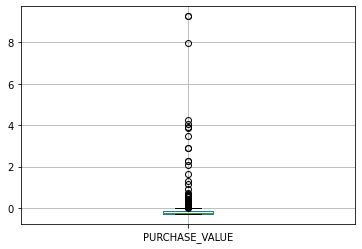

In [261]:
X.boxplot(['PURCHASE_VALUE'])

<AxesSubplot:>

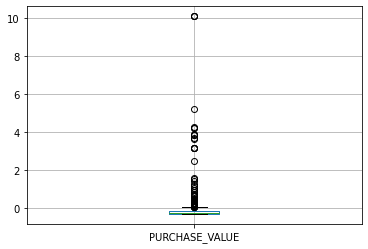

In [262]:
test.boxplot(['PURCHASE_VALUE'])

<AxesSubplot:>

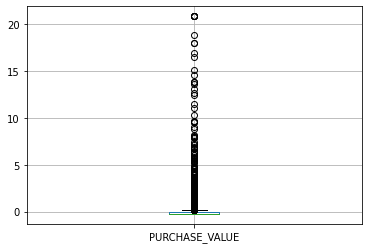

In [263]:
extr.boxplot(['PURCHASE_VALUE'])

In [264]:
X.dtypes

PURCHASE_VALUE                           float64
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY      int64
USER_AGE                                 float64
USER_GENDER                                int64
USER_HOUSEHOLD                             int64
Month                                      int64
Year                                       int64
Day                                        int64
partsM                                     int64
SocialClass                                int64
purchaseIMP                                int64
dtype: object

In [265]:
y.unique()

array([11, 13,  2,  9,  1, 10,  7, 12,  5,  6,  4,  8,  3], dtype=int64)

In [266]:
X.shape

(373, 11)

Now we have more independent variables than before (235 variables). This doesn’t mean all these variables are important to train our model. You need to select only important features that can increase the performance of the model. But we will not apply any feature selection technique in this article; if you want to learn and know more about feature selection techniques, we recommend you read the following articles:


*    [Introduction to Feature Selection methods with an example (or how to select the right variables?)](https://https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/)
*   [The 5 Feature Selection Algorithms every Data Scientist should know](https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2)
*   [How to Choose a Feature Selection Method For Machine Learning](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)
*   [Feature Selection Techniques in Machine Learning with Python](https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e)

##4. Model Building and Experiments
A portion of the training data set will be used to evaluate our models and find the best one that performs well before using it in the test dataset.


In [267]:
# # Split the training data

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=101)

Only 10% of the train dataset will be used for evaluating the models. 

There are many models to choose from such as 

*   [K Nearest Neighbors](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn)
*   [Logistic Regression](https://machinelearningmastery.com/logistic-regression-tutorial-for-machine-learning/)
*   [Random Forest](https://www.datacamp.com/community/tutorials/random-forests-classifier-python)
*   [XGBoost](https://www.datacamp.com/community/tutorials/xgboost-in-python)


Fit models

Let's try a decision tree first

Let's try random forest with 100 estimators

# Grid search 

this is a randomiz cross validation

In [755]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [756]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = BalancedRandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=BalancedRandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [757]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': False}

In [1085]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [False],
    'max_depth': [20, 30, 50, 60],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [1500, 1800, 2000, 2500]}
    
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X,y)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': False,
 'max_depth': 50,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 2500}

In [268]:
from sklearn.model_selection import StratifiedKFold
from imblearn.ensemble import BalancedRandomForestClassifier
skf = StratifiedKFold(n_splits=10) 
y_pred_totcb=[]
scores=0
fold_no = 1
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = BalancedRandomForestClassifier(n_estimators=2500,max_depth=50,min_samples_split=2,min_samples_leaf=1,bootstrap=False, max_features=3)
    model.fit(X_train,y_train)
    predictions = model.predict_proba(X_test)
    print('Fold',str(fold_no),'Accuracy:',log_loss(y_test,predictions, labels=model.classes_)) 
    fold_no += 1
    y_pred_totcb.append(predictions)
    scores+=log_loss(y_test,predictions, labels=model.classes_)
scores/10

Fold 1 Accuracy: 2.3038726812040813
Fold 2 Accuracy: 2.500830971349686
Fold 3 Accuracy: 2.5117420761287303
Fold 4 Accuracy: 2.3853930479667067
Fold 5 Accuracy: 2.3413506754758404
Fold 6 Accuracy: 2.035939185275472
Fold 7 Accuracy: 2.160213449995082
Fold 8 Accuracy: 2.28863993394096
Fold 9 Accuracy: 2.0533427559769857
Fold 10 Accuracy: 2.15199664152867


2.273332141884221

In [269]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

# Creating a RF classifier
clf = BalancedRandomForestClassifier(n_estimators=2500,max_depth=50,min_samples_split=2,min_samples_leaf=1,bootstrap=False, max_features=3)
 
# Training the model on the training dataset
clf.fit(X_train, y_train)
 
# Performing predictions on the test dataset
y_pred = clf.predict_proba(X_val)

# Calculate accuracy
print("ACCURACY OF THE MODEL: ", log_loss(y_val, y_pred, labels=clf.classes_))

# Classification report
#print(classification_report(y_val, y_pred))


ACCURACY OF THE MODEL:  1.7529066489799645


# Predicting the target of the extra data to oversample the train

In [270]:
extr

,PURCHASE_VALUE,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,Transaction_ID,Month,Year,Day,partsM,SocialClass,purchaseIMP
0,-0.256621,0,27.0,0,1,10000,ID_v13grrw3,3,21,22,3,2,0
1,-0.259296,0,27.0,0,1,10000,ID_rgne8ij5,7,21,5,1,2,0
2,-0.048229,0,27.0,0,1,10000,ID_4i2b28b6,6,21,21,3,2,0
3,-0.048229,0,27.0,0,1,10000,ID_6dvi32yc,4,21,22,3,2,0
4,-0.259296,0,27.0,0,1,10000,ID_sfk1yxbm,7,21,29,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.255213,0,27.0,0,1,5000,ID_6arln23v,4,22,9,3,3,0
9996,-0.245357,0,27.0,0,1,5000,ID_msuxva0z,4,22,9,3,3,0
9997,-0.256621,0,27.0,0,1,5000,ID_flro17hp,4,22,10,3,3,0
9998,14.567341,0,27.0,1,1,35000,ID_bb2ghfuy,12,21,29,2,2,2


In [271]:
extr.drop(['Transaction_ID','USER_INCOME'],axis=1,inplace=True)

In [272]:
extrp=clf.predict(extr)

In [273]:
extr["MERCHANT_CATEGORIZED_AS"]=extrp

In [274]:
replace_map_train

{'MERCHANT_CATEGORIZED_AS': {'Bills & Fees': 1,
  'Data & WiFi': 2,
  'Education': 3,
  'Emergency fund': 4,
  'Family & Friends': 5,
  'Going out': 6,
  'Groceries': 7,
  'Health': 8,
  'Loan Repayment': 9,
  'Miscellaneous': 10,
  'Rent / Mortgage': 11,
  'Shopping': 12,
  'Transport & Fuel': 13}}

In [152]:
replace_map_train=replace_map_train['MERCHANT_CATEGORIZED_AS']
replace_map_train = {v: k for k, v in replace_map_train.items()}
print(replace_map_train)

{1: 'Bills & Fees', 2: 'Data & WiFi', 3: 'Education', 4: 'Emergency fund', 5: 'Family & Friends', 6: 'Going out', 7: 'Groceries', 8: 'Health', 9: 'Loan Repayment', 10: 'Miscellaneous', 11: 'Rent / Mortgage', 12: 'Shopping', 13: 'Transport & Fuel'}


In [154]:
extr["MERCHANT_CATEGORIZED_AS"]=extr["MERCHANT_CATEGORIZED_AS"].apply(lambda x: replace_map_train[x])
train["MERCHANT_CATEGORIZED_AS"]=train["MERCHANT_CATEGORIZED_AS"].apply(lambda x: replace_map_train[x])


<BarContainer object of 10000 artists>

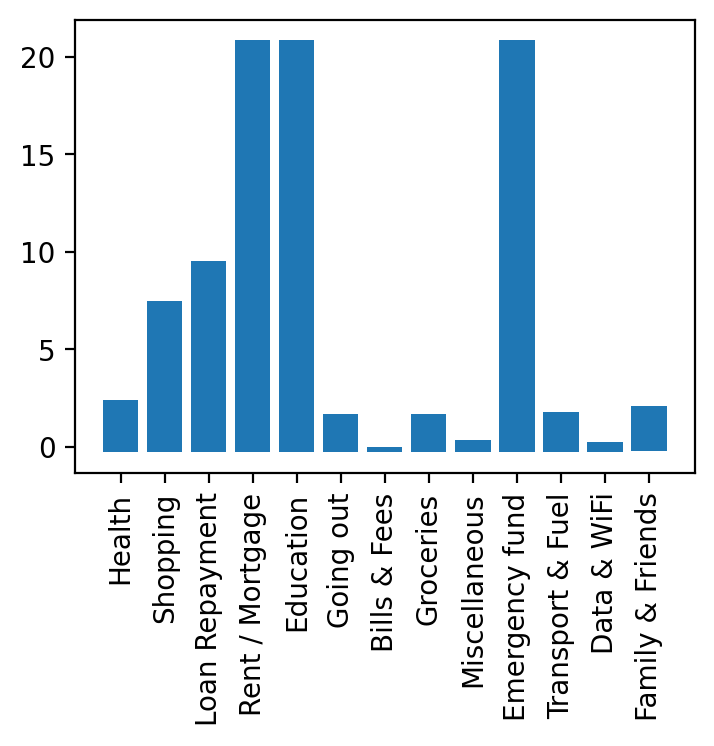

In [155]:
# Show a bar graph of the purchase_value vs the target in the train data (merchant_categorized_as)
plt.figure(dpi=200, figsize=(4,3))
plt.xticks(rotation=90)
plt.bar(data=extr, x='MERCHANT_CATEGORIZED_AS', height='PURCHASE_VALUE')

In [156]:
extr[extr['MERCHANT_CATEGORIZED_AS']=='Going out'].count()


PURCHASE_VALUE                           506
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY    506
USER_AGE                                 506
USER_GENDER                              506
USER_HOUSEHOLD                           506
Month                                    506
Year                                     506
Day                                      506
partsM                                   506
SocialClass                              506
purchaseIMP                              506
MERCHANT_CATEGORIZED_AS                  506
dtype: int64

In [157]:
train[train['MERCHANT_CATEGORIZED_AS']=='Groceries'].count()

MERCHANT_CATEGORIZED_AS                  50
PURCHASE_VALUE                           50
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY    50
USER_AGE                                 50
USER_GENDER                              50
USER_HOUSEHOLD                           50
Month                                    50
Year                                     50
Day                                      50
partsM                                   50
SocialClass                              50
purchaseIMP                              50
dtype: int64

In [160]:
labels_train = extr['MERCHANT_CATEGORIZED_AS'].astype('category').cat.categories.tolist()
replace_map_train = {'MERCHANT_CATEGORIZED_AS' : {k: v for k,v in zip(labels_train,list(range(1,len(labels_train)+1)))}}
print("Train data: ", replace_map_train)
extr.replace(replace_map_train,inplace=True)

Train data:  {'MERCHANT_CATEGORIZED_AS': {'Bills & Fees': 1, 'Data & WiFi': 2, 'Education': 3, 'Emergency fund': 4, 'Family & Friends': 5, 'Going out': 6, 'Groceries': 7, 'Health': 8, 'Loan Repayment': 9, 'Miscellaneous': 10, 'Rent / Mortgage': 11, 'Shopping': 12, 'Transport & Fuel': 13}}


In [161]:
labels_train = train['MERCHANT_CATEGORIZED_AS'].astype('category').cat.categories.tolist()
replace_map_train = {'MERCHANT_CATEGORIZED_AS' : {k: v for k,v in zip(labels_train,list(range(1,len(labels_train)+1)))}}
print("Train data: ", replace_map_train)
train.replace(replace_map_train,inplace=True)

Train data:  {'MERCHANT_CATEGORIZED_AS': {'Bills & Fees': 1, 'Data & WiFi': 2, 'Education': 3, 'Emergency fund': 4, 'Family & Friends': 5, 'Going out': 6, 'Groceries': 7, 'Health': 8, 'Loan Repayment': 9, 'Miscellaneous': 10, 'Rent / Mortgage': 11, 'Shopping': 12, 'Transport & Fuel': 13}}


In [275]:
extr

,PURCHASE_VALUE,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,Month,Year,Day,partsM,SocialClass,purchaseIMP,MERCHANT_CATEGORIZED_AS
0,-0.256621,0,27.0,0,1,3,21,22,3,2,0,8
1,-0.259296,0,27.0,0,1,7,21,5,1,2,0,11
2,-0.048229,0,27.0,0,1,6,21,21,3,2,0,12
3,-0.048229,0,27.0,0,1,4,21,22,3,2,0,12
4,-0.259296,0,27.0,0,1,7,21,29,2,2,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.255213,0,27.0,0,1,4,22,9,3,3,0,10
9996,-0.245357,0,27.0,0,1,4,22,9,3,3,0,10
9997,-0.256621,0,27.0,0,1,4,22,10,3,3,0,10
9998,14.567341,0,27.0,1,1,12,21,29,2,2,2,4


In [276]:
e3=extr.query("MERCHANT_CATEGORIZED_AS == 3").sample(n=30)
e4=extr.query("MERCHANT_CATEGORIZED_AS == 4").sample(n=30)
e8=extr.query("MERCHANT_CATEGORIZED_AS == 8").sample(n=30)
e9=extr.query("MERCHANT_CATEGORIZED_AS == 9").sample(n=30)
e11=extr.query("MERCHANT_CATEGORIZED_AS == 11").sample(n=30)

In [277]:
X['MERCHANT_CATEGORIZED_AS']=y

In [278]:
train=X

In [279]:
train=pd.concat([train,e3], ignore_index=True)
train=pd.concat([train,e4], ignore_index=True)
train=pd.concat([train,e8], ignore_index=True)
train=pd.concat([train,e9], ignore_index=True)
train=pd.concat([train,e11], ignore_index=True)

In [1288]:
e12=extr.query("MERCHANT_CATEGORIZED_AS == 12").sample(n=15)
e13=extr.query("MERCHANT_CATEGORIZED_AS == 13").sample(n=15)

In [1289]:
train=pd.concat([train,e12], ignore_index=True)
train=pd.concat([train,e13], ignore_index=True)

In [280]:
train['MERCHANT_CATEGORIZED_AS'].value_counts()

1     78
7     50
2     43
10    43
4     42
5     41
6     41
8     36
9     35
11    32
3     32
13    29
12    21
Name: MERCHANT_CATEGORIZED_AS, dtype: int64

# predicting on the new oversampled dataset

In [281]:
X=train.drop('MERCHANT_CATEGORIZED_AS',axis=1)
y=train['MERCHANT_CATEGORIZED_AS']

In [282]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5) 
y_pred_totcb=[]
scores=0
fold_no = 1
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = BalancedRandomForestClassifier(n_estimators=2500,max_depth=50,min_samples_split=2,min_samples_leaf=1,bootstrap=False, max_features=3)
    model.fit(X_train,y_train)
    predictions = model.predict_proba(X_test)
    print('Fold',str(fold_no),'Accuracy:',log_loss(y_test,predictions, labels=model.classes_)) 
    fold_no += 1
    y_pred_totcb.append(predictions)
    scores+=log_loss(y_test,predictions, labels=model.classes_)
scores/5

Fold 1 Accuracy: 2.0616630332417394
Fold 2 Accuracy: 1.4723513166364057
Fold 3 Accuracy: 1.570728906658591
Fold 4 Accuracy: 1.456702705542506
Fold 5 Accuracy: 1.3797573717642893


0.7941203333843532

In [283]:
0.7941203333843532*2

1.5882406667687063

In [284]:
# # Split the training data

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=101)

In [287]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

# Creating a RF classifier
clf = BalancedRandomForestClassifier(n_estimators=2500,max_depth=50,min_samples_split=2,min_samples_leaf=1,bootstrap=False, max_features=3)
 
# Training the model on the training dataset
clf.fit(X_train, y_train)
 
# Performing predictions on the test dataset
y_pred = clf.predict_proba(X_val)

# Calculate accuracy
print("ACCURACY OF THE MODEL: ", log_loss(y_val, y_pred, labels=clf.classes_))

# Classification report
#print(classification_report(y_val, y_pred))

ACCURACY OF THE MODEL:  1.9683286180161417


In [1298]:
clf = BalancedRandomForestClassifier(n_estimators=1800,max_depth=20,min_samples_split=2,min_samples_leaf=1,bootstrap=False, max_features=3)
 
# Training the model on the training dataset
clf.fit(X, y)

BalancedRandomForestClassifier(bootstrap=False, max_depth=20, max_features=3,
                               n_estimators=1800)

### 5. Making the first submission

Let’s see how the model performs on the competition test data set provided and how we rank on the competition leaderboard.

First we make predictions on the competition test data set.

In [1074]:
X

,PURCHASE_VALUE,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,Month,Year,Day,partsM,SocialClass,purchaseIMP
0,-0.178506,0,25.0,0,3,5,22,4,1,2,0
1,-0.280273,0,25.0,1,4,10,21,24,3,2,0
2,-0.285361,0,25.0,0,3,5,22,27,2,2,0
3,-0.044938,0,25.0,0,5,2,22,7,3,1,0
4,-0.282817,0,25.0,0,3,5,22,4,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
368,-0.254831,1,27.0,1,2,8,21,26,2,2,0
369,-0.261192,1,25.0,0,5,4,22,3,1,1,0
370,-0.254831,0,25.0,0,3,1,21,15,3,2,0
371,0.603824,1,25.0,1,4,10,21,8,3,2,0


In [1254]:
train['MERCHANT_CATEGORIZED_AS'].value_counts()

1     78
7     50
2     43
10    43
5     41
6     41
13    29
12    21
4     12
8      6
9      5
11     2
3      2
Name: MERCHANT_CATEGORIZED_AS, dtype: int64

In [288]:
#test=test.fillna(0)
test

,PURCHASE_VALUE,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,Transaction_ID,Month,Year,Day,partsM,SocialClass,purchaseIMP
0,10.098990,1,25.0,0,5,150000,ID_00x9h2yx,5,22,5,1,2,2
1,0.219558,0,25.0,1,1,10000,ID_01db594f,10,19,5,1,2,0
2,-0.278826,0,25.0,1,1,85000,ID_07pm99no,11,21,25,3,2,0
3,-0.289218,0,25.0,0,2,10000,ID_09jryhkd,4,22,11,3,2,0
4,0.400096,0,25.0,0,3,10000,ID_0ccv924c,5,22,4,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,0.164967,0,25.0,0,3,200000,ID_zvole537,11,21,27,2,2,0
554,-0.228392,1,25.0,0,5,252000,ID_zy4igt1w,1,22,25,3,1,0
555,-0.290603,0,25.0,0,5,252000,ID_zy4urqmq,2,22,10,3,1,0
556,3.171209,1,25.0,1,3,85000,ID_zym0pkxl,9,19,7,3,2,1


In [290]:
test=test.drop('USER_INCOME',axis=1)

In [291]:
# Get the predicted result for the test Data
predictions = clf.predict_proba(test.drop("Transaction_ID", axis=1))

In [1]:
test

NameError: name 'test' is not defined

In [293]:
prdd=pd.DataFrame(predictions,columns=labels_train)

In [294]:
prdd['Transaction_ID']=test['Transaction_ID']

In [295]:
sub=prdd

In [296]:
first_column = prdd.pop('Transaction_ID')
  
# insert column using insert(position,column_name,
# first_column) function
prdd.insert(0, 'Transaction_ID', first_column)

In [297]:
sub

,Transaction_ID,Bills & Fees,Data & WiFi,Education,Emergency fund,Family & Friends,Going out,Groceries,Health,Loan Repayment,Miscellaneous,Rent / Mortgage,Shopping,Transport & Fuel
0,ID_00x9h2yx,0.3356,0.0860,0.0348,0.1164,0.1928,0.0080,0.0064,0.0000,0.0152,0.0588,0.0224,0.1020,0.0216
1,ID_01db594f,0.0464,0.0652,0.0056,0.1216,0.0632,0.4448,0.1430,0.0044,0.0016,0.0332,0.0180,0.0272,0.0258
2,ID_07pm99no,0.0048,0.0096,0.0000,0.0024,0.0040,0.1828,0.0564,0.0580,0.0000,0.0420,0.0000,0.4972,0.1428
3,ID_09jryhkd,0.0854,0.4372,0.0000,0.0088,0.0134,0.1464,0.0056,0.0000,0.0012,0.2904,0.0020,0.0016,0.0080
4,ID_0ccv924c,0.0980,0.0624,0.0128,0.0728,0.0204,0.0688,0.0676,0.0000,0.0028,0.0092,0.5156,0.0420,0.0276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,ID_zvole537,0.0168,0.0044,0.0052,0.0248,0.0188,0.2352,0.4524,0.0180,0.0004,0.0004,0.0064,0.0288,0.1884
554,ID_zy4igt1w,0.0608,0.1944,0.0008,0.0004,0.5608,0.0484,0.0044,0.0000,0.0068,0.0032,0.0000,0.0032,0.1168
555,ID_zy4urqmq,0.0176,0.1580,0.0036,0.0000,0.0016,0.2652,0.0136,0.0032,0.0624,0.0664,0.0036,0.0120,0.3928
556,ID_zym0pkxl,0.2848,0.0864,0.0096,0.0352,0.3700,0.0204,0.0236,0.0000,0.0020,0.0384,0.0476,0.0684,0.0136


In [544]:
replace_map_train=replace_map_train['MERCHANT_CATEGORIZED_AS']
replace_map_train = {v: k for k, v in replace_map_train.items()}
print(replace_map_train)

{1: 'Bills & Fees', 2: 'Data & WiFi', 3: 'Education', 4: 'Emergency fund', 5: 'Family & Friends', 6: 'Going out', 7: 'Groceries', 8: 'Health', 9: 'Loan Repayment', 10: 'Miscellaneous', 11: 'Rent / Mortgage', 12: 'Shopping', 13: 'Transport & Fuel'}


In [545]:
#replace_map_train

In [546]:
#replace_map_train.values()

In [547]:
test[["Transaction_ID",  "predictions"]].head()

,Transaction_ID,predictions
0,ID_00x9h2yx,1
1,ID_01db594f,6
2,ID_07pm99no,12
3,ID_09jryhkd,2
4,ID_0ccv924c,11


In [548]:
test['predictions']=test['predictions'].apply(lambda x: replace_map_train[x])

In [549]:
test[["Transaction_ID",  "predictions"]]["predictions"].nunique()

13

- We need to convert our submissions to the sample submission format.

- We also can see that our model is not doing so good, we only predicted 11 categories instead of 13, for **log loss** to work we need to have **all the categories predicted**. Let's do a deep dive of which category is missing.

In [550]:
test[["Transaction_ID",  "predictions"]]["predictions"].unique()

array(['Bills & Fees', 'Going out', 'Shopping', 'Data & WiFi',
       'Rent / Mortgage', 'Miscellaneous', 'Groceries',
       'Family & Friends', 'Transport & Fuel', 'Emergency fund',
       'Loan Repayment', 'Health', 'Education'], dtype=object)

In [285]:
labels_train

['Bills & Fees',
 'Data & WiFi',
 'Education',
 'Emergency fund',
 'Family & Friends',
 'Going out',
 'Groceries',
 'Health',
 'Loan Repayment',
 'Miscellaneous',
 'Rent / Mortgage',
 'Shopping',
 'Transport & Fuel']

- **Education** and **Rent/Mortgage** is not predicted, from the graph provided earlier we also see that the education bar count is very small.

**Note** this is only for demotration purpose, I'll edit one row to `education`  and the other to `Rent/Mortgage` so we can get our log loss working. **This should not be done, ensure that your models are able to predict all the classes if not create a column with any missing category  after coverting the submission to log loss and fill all the rows with 0s**

In [551]:
sub = test[["Transaction_ID",  "predictions"]]
sub.at[1,'predictions']='Education'
sub.at[2,'predictions']='Rent / Mortgage'

In [552]:
ss.sample(1)

,Transaction_ID,Bills & Fees,Data & WiFi,Education,Emergency fund,Family & Friends,Going out,Groceries,Health,Loan Repayment,Miscellaneous,Rent / Mortgage,Shopping,Transport & Fuel
1,ID_01db594f,0,0,0,0,0,0,0,0,0,0,0,0,0


In [553]:
sub = pd.get_dummies(sub, columns=['predictions'])

# remove the prefix
sub.columns = sub.columns.str.replace('predictions_','')

In [554]:
sub.head(3)

,Transaction_ID,Bills & Fees,Data & WiFi,Education,Emergency fund,Family & Friends,Going out,Groceries,Health,Loan Repayment,Miscellaneous,Rent / Mortgage,Shopping,Transport & Fuel
0,ID_00x9h2yx,1,0,0,0,0,0,0,0,0,0,0,0,0
1,ID_01db594f,0,0,1,0,0,0,0,0,0,0,0,0,0
2,ID_07pm99no,0,0,0,0,0,0,0,0,0,0,1,0,0


In [298]:
sub.shape

(558, 14)

Save results in the CSV file.

In [299]:
# Create the submission csv file
sub.to_csv('16_submission.csv', index = False)

We named our submission file a first_submission.csv. Now we can upload it to the Zindi competition page by clicking the submit button and selecting the file to upload. You also have an option to add comments for each submission.

## More Tips
- Look at the extra dataset provided, check if it's resourceful for training
- Thorough EDA and domain knowledge sourcing
- Re-group Categorical features 
- More Feature Engineering 
- Dataset balancing - oversampling, undersampling, SMOTE...
- Ensembling of models 
- Cross-validation: Group folds, Stratified...

In [300]:
#train.to_csv('extratrain.csv')

In [294]:
extr.isna().sum()

MERCHANT_CATEGORIZED_AT                  10000
MERCHANT_NAME                                0
MERCHANT_CATEGORIZED_AS                  10000
PURCHASE_VALUE                               0
PURCHASED_AT                                 0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY        0
USER_AGE                                  8842
USER_GENDER                                 34
USER_HOUSEHOLD                               0
USER_INCOME                                  0
USER_ID                                      0
Transaction_ID                               0
dtype: int64

In [291]:
extr=pd.read_csv('extra_data.csv')